<img src=https://www.nersc.gov/_resources/themes/nersc/images/NERSC_logo_no_spacing.svg width="500">

## National Energy Research Scientific Computing Center

# Introduction to High Performance Computing Bootcamp - Argonne National Laboratory August 2025
# Module 3: NERSC Users and Application Power & Energy Analysis

## 🎯 Learning Outcomes

By the end of this module, you will be able to:

- Investigate energy usage patterns and compute allocations at large-scale computing centers like NERSC.
- Analyze GPU versus CPU utilization over time and estimate the carbon impact of scientific computing workloads.
- Use visualization tools to explore user trends, organizational distributions, and project-level compute behaviors.


# Exploring the World of Data with Visual Flair 📊

![Data Exploration](https://images.unsplash.com/photo-1551288049-bebda4e38f71?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=M3w0NDgzMDl8MHwxfHNlYXJjaHw0fHxkYXRhJTIwZXhwbG9yYXRpb258ZW58MHx8fHwxNjkwOTU3NjgxfDA&ixlib=rb-4.0.3&q=80&w=400)

Welcome to our data exploration journey! In this notebook, we'll be diving into a fascinating dataset, uncovering insights, patterns, and stories hidden within the numbers. But worry not, we won't be alone on this adventure. We have some of the most powerful Python libraries by our side:

- **Pandas**: Our trusty data manipulation tool, capable of slicing and dicing the data just the way we want it.
- **NumPy**: The mathematical wizard, handling all the numerical operations with ease and grace.
- **Matplotlib**: The artist of the group, painting our insights in the form of beautiful and informative plots.
- **Seaborn**: Matplotlib's sophisticated sibling, adding a touch of elegance and simplicity to our visualizations.

Together, these tools will help us unravel the mysteries within our data. We'll start by setting a clean and crisp style for our plots, thanks to Seaborn's 'whitegrid'. Then, we'll read in our data file (don't forget to upload it or provide the path), and take a sneak peek at the first few rows.

Ready to embark on this exciting exploration? Let's dive in! 🚀


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style('whitegrid')

# Reading the data (please upload the file or provide the path)
# data = pd.read_csv('path_to_file.csv')

# Displaying the first few rows of the data
# data.head()

In [2]:
# Sample data
data_sample = '''
User Name,Organization,Organization Type,Organization Country,Is Active,CPU Compute Allocation,CPU Node Hours Charged,GPU Compute Allocation,GPU Node Hours Charged,PI Name,Project Description,Department,Organization City
u232,Auburn University,UNIV,United States of America,True,23399.0,2426.4169444444447,150.0,0.0,Michael Pindzola,Computational Atomic and Molecular Physics for Fusion Energy Sciences,Department of Physics,Auburn
u344,CompX - Computational Modeling and Software Development,SMBUS,United States of America,True,5000.0,0.0,7500.0,0.0,Jin Myung Park,AToM-2 SciDAC - Advanced Tokamak Modeling Environment,Fusion Theory,Del Mar
u431,Princeton Plasma Physics Laboratory (PPPL),DOELAB,United States of America,True,81000.0,13781.63361111111,10075.0,1.1616666666666666,Stephen Jardin,3D Extended MHD simulation of fusion plasmas,Theory and Computation,Princeton
u460,Princeton Plasma Physics Laboratory (PPPL),DOELAB,United States of America,True,0.0,0.0,100.0,0.0,Richard Gerber,NERSC overhead account for users with no active repo,,Princeton
u617,Pacific Northwest National Laboratory (PNNL),DOELAB,United States of America,True,15170.3,0.0,29525.0,0.0,Sotiris Xantheas,"Guest-host interactions in the gas phase, in aqueous systems and hydrate lattices","Advanced Computing, Mathematics and Data",Richland
u650,CompX - Computational Modeling and Software Development,SMBUS,United States of America,True,42800.0,0.0,11925.0,0.0,Paul Bonoli,Center for Integrated Simulation of Fusion Relevant RF Actuators: SciDAC Project,Fusion,Del Mar
u1103,University of Alaska Fairbanks,UNIV,United States of America,True,2062.5,0.0,15075.0,0.0,Jean-Noel Leboeuf,Gyrokinetic Studies of Non-Diffusive Transport,Department of Physics,Fairbanks
u1165,University of Maryland,UNIV,United States of America,True,1000.0,0.0,2500.0,0.0,William Dorland,"Turbulence, Transport and Magnetic Reconnection in High Temperature Plasma",,College Park
u70270,Lawrence Berkeley National Laboratory,DOELAB,United States of America,True,85.45555555555555,0.0,7.5,0.0,C. William McCurdy,Electron and Photon Collisions with Atoms and Molecules,Chemistry,Berkeley
u1446,Oak Ridge National Laboratory,DOELAB,United States of America,True,2000.0,0.0,2500.0,0.0,Jin Myung Park,AToM-2 SciDAC - Advanced Tokamak Modeling Environment,Fusion Energy Division,Oak Ridge
'''

# Converting the sample data to a DataFrame
# Reading data from the CSV file
file_path = 'data/NERSC_User_Data_202307.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Displaying column information for analyzing and visualization
print("\nColumn information:")
print(data.info())

# Displaying summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(data.describe())

First few rows of the data:
   Unnamed: 0 User Name                                       Organization  \
0           0      u232                                  Auburn University   
1           1      u344  CompX - Computational Modeling and Software De...   
2           2      u431         Princeton Plasma Physics Laboratory (PPPL)   
3           3      u460         Princeton Plasma Physics Laboratory (PPPL)   
4           4      u617       Pacific Northwest National Laboratory (PNNL)   

  Organization Type      Organization Country  Is Active  \
0              UNIV  United States of America       True   
1             SMBUS  United States of America       True   
2            DOELAB  United States of America       True   
3            DOELAB  United States of America       True   
4            DOELAB  United States of America       True   

   CPU Compute Allocation  CPU Node Hours Charged  GPU Compute Allocation  \
0                 23399.0             2426.416944                

## Overview of the Dataset
Let's start by getting an overview of the dataset. We'll explore the basic statistics, data types, and null values in the dataset. This will give us a good understanding of the data we're working with.

In [3]:
# Basic statistics of the dataset
data_description = data.describe()
data_description

,Unnamed: 0,CPU Compute Allocation,CPU Node Hours Charged,GPU Compute Allocation,GPU Node Hours Charged
count,9551.000000,9.551000e+03,9551.000000,9.551000e+03,9551.000000
mean,4775.000000,3.551370e+06,982.215946,2.313290e+04,318.251654
std,2757.280544,1.527571e+08,11856.164689,1.286750e+05,5671.619128
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2387.500000,3.000000e+02,0.000000,1.000000e+02,0.000000
50%,4775.000000,2.000000e+03,0.000000,9.000000e+02,0.000000
75%,7162.500000,9.000000e+03,5.338750,5.011252e+03,0.000000
max,9550.000000,1.080000e+10,753933.293333,1.473210e+06,429891.557222


In [4]:
# Data types of the columns
data_types = data.dtypes
data_types

Unnamed: 0                  int64
User Name                  object
Organization               object
Organization Type          object
Organization Country       object
Is Active                    bool
CPU Compute Allocation    float64
CPU Node Hours Charged    float64
GPU Compute Allocation    float64
GPU Node Hours Charged    float64
PI Name                    object
Project Description        object
Department                 object
Organization City          object
dtype: object

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

Unnamed: 0                  0
User Name                   0
Organization                0
Organization Type           0
Organization Country        0
Is Active                   0
CPU Compute Allocation      0
CPU Node Hours Charged      0
GPU Compute Allocation      0
GPU Node Hours Charged      0
PI Name                   237
Project Description       237
Department                744
Organization City           1
dtype: int64

## Distribution of Numerical Columns
We will visualize the distribution of numerical columns using histograms. This will help us understand the range and distribution of values in these columns.

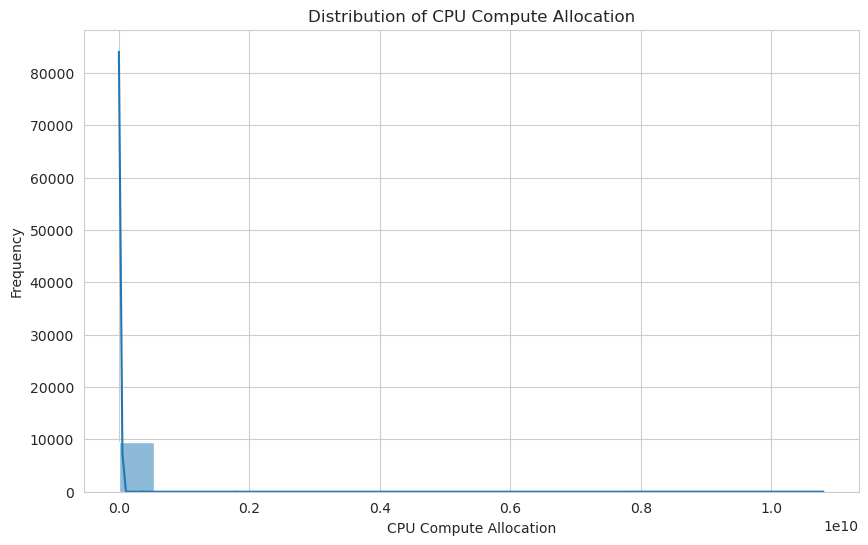

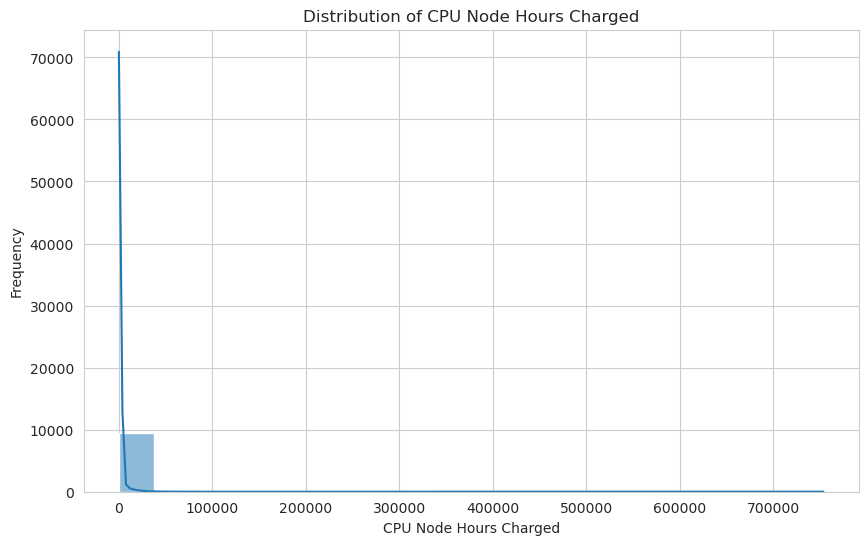

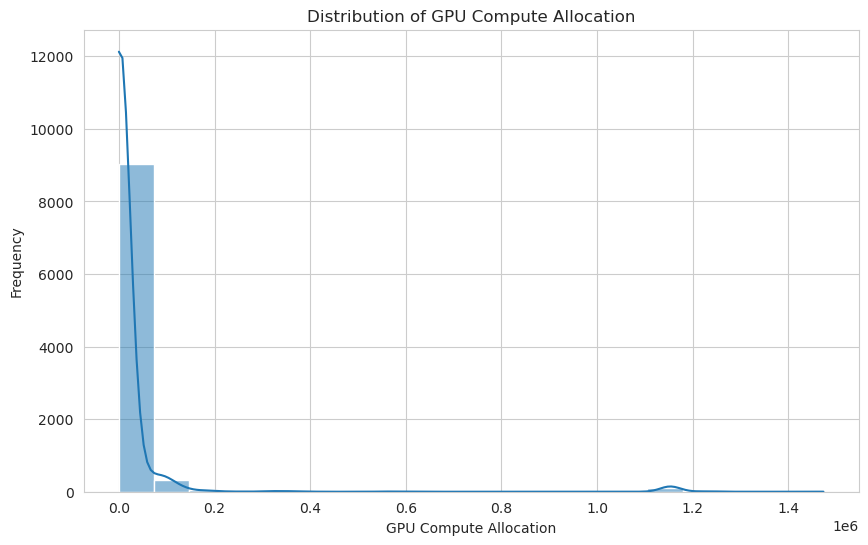

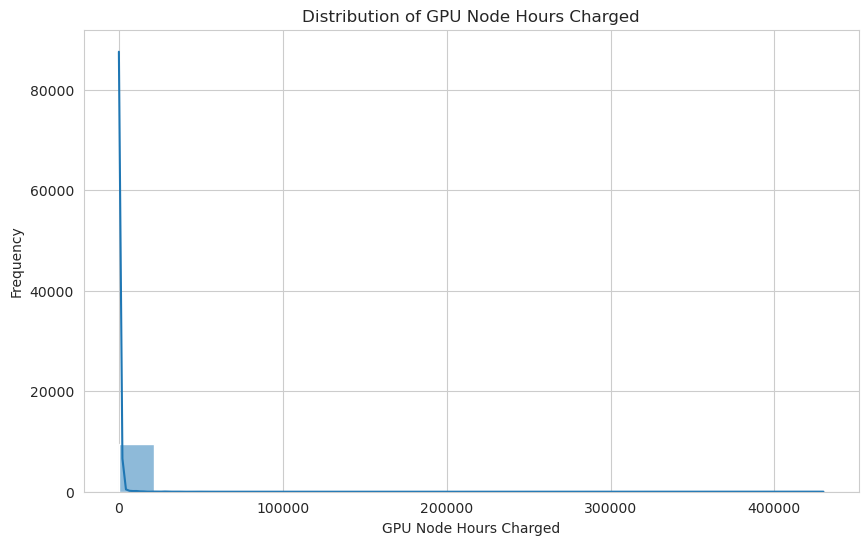

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting histograms for numerical columns
numerical_columns = ['CPU Compute Allocation', 'CPU Node Hours Charged', 'GPU Compute Allocation', 'GPU Node Hours Charged']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Distribution of Categorical Columns
We will explore the distribution of categorical columns such as 'Organization Type', 'Organization Country', and 'Is Active'. Understanding the distribution of these categories will provide insights into the composition of the dataset.

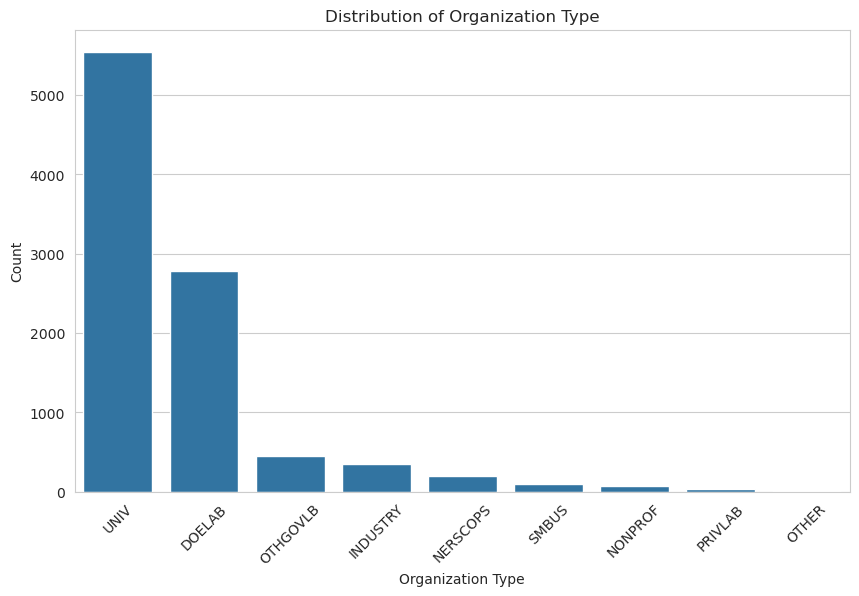

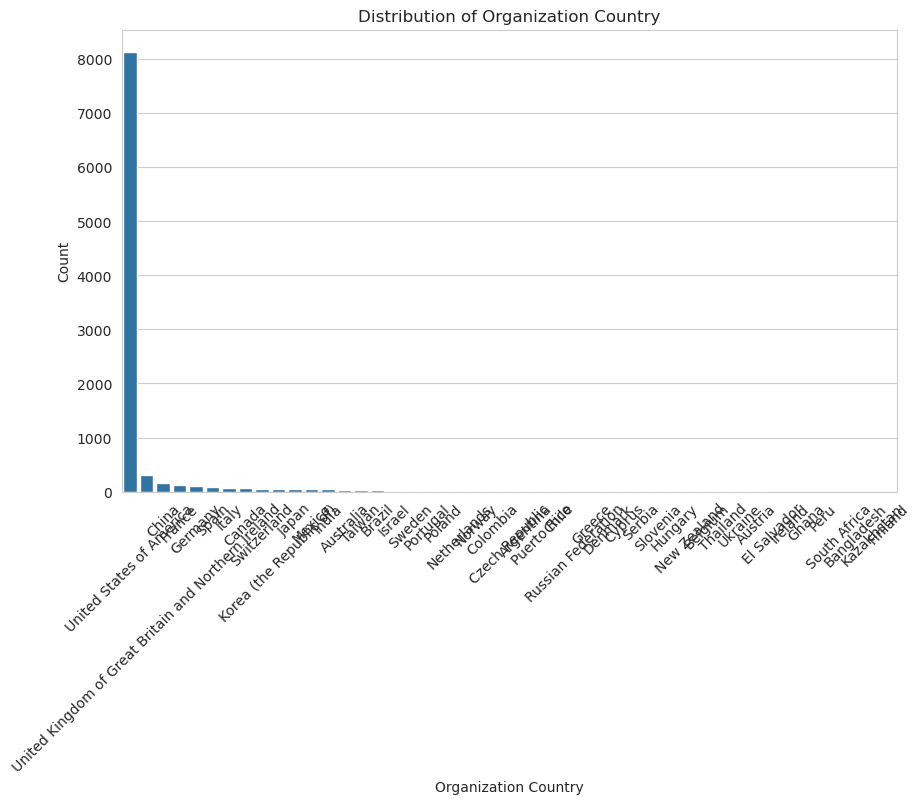

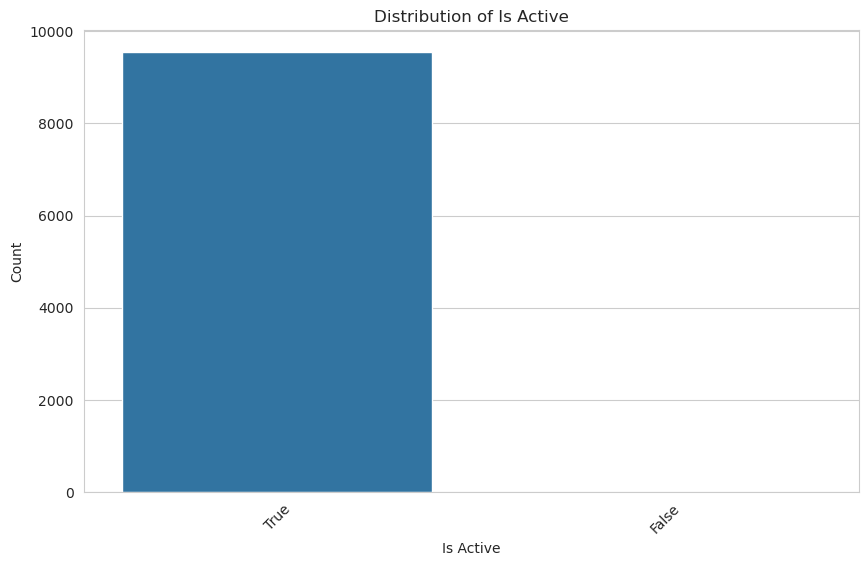

In [7]:
# Plotting bar plots for categorical columns
categorical_columns = ['Organization Type', 'Organization Country', 'Is Active']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Analyzing Relationships Between Variables
We will analyze the relationships between different variables in the dataset. This includes exploring correlations between numerical variables and understanding how different factors such as organization type and country influence compute allocations.

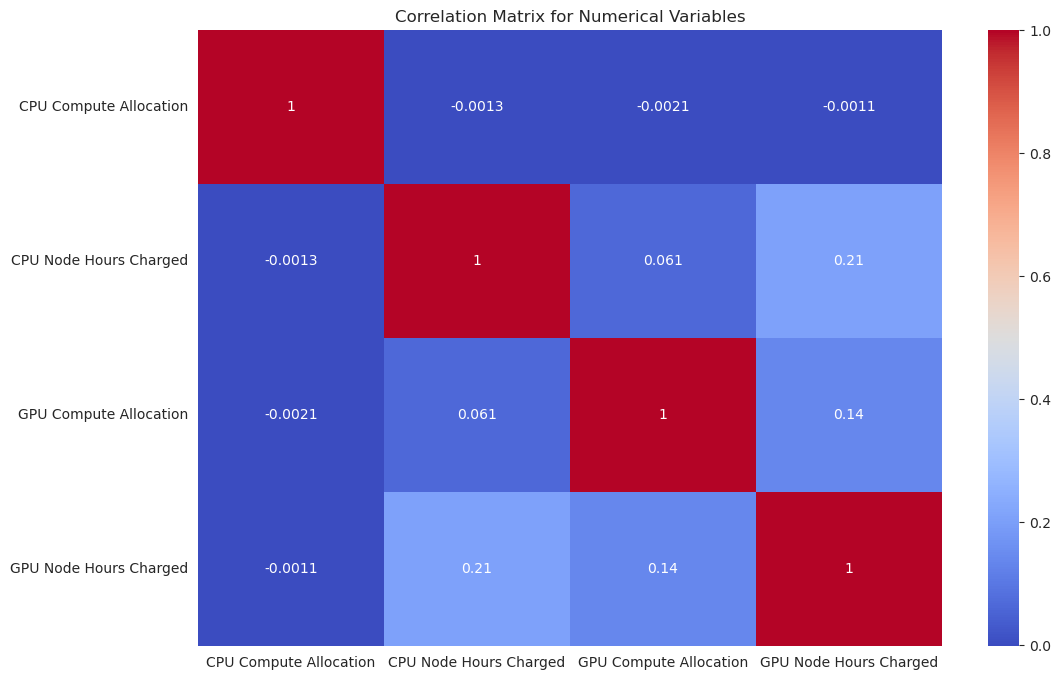

In [8]:
# Correlation matrix for numerical variables
correlation_matrix = data[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


## ⚖️ GPU vs CPU Utilization Trends (Plotly)

We visualize power usage and allocation trends between CPU and GPU compute types.


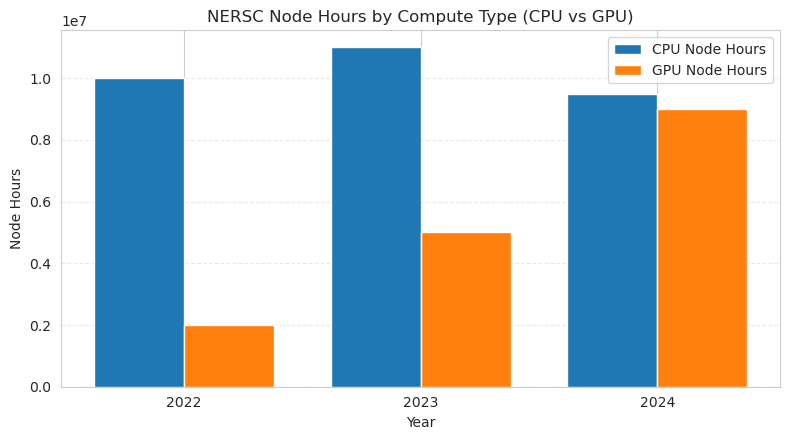

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mock data - replace with live or updated NERSC dataset when available
df = pd.DataFrame({
    'Year': [2022, 2023, 2024],
    'GPU Node Hours': [2_000_000, 5_000_000, 9_000_000],
    'CPU Node Hours': [10_000_000, 11_000_000, 9_500_000]
})

years = df['Year'].values
gpu = df['GPU Node Hours'].values
cpu = df['CPU Node Hours'].values

x = np.arange(len(years))
width = 0.38

plt.figure(figsize=(8, 4.5))
plt.bar(x - width/2, cpu, width, label='CPU Node Hours')
plt.bar(x + width/2, gpu, width, label='GPU Node Hours')

plt.title('NERSC Node Hours by Compute Type (CPU vs GPU)')
plt.xlabel('Year')
plt.ylabel('Node Hours')
plt.xticks(x, years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



## 🌍 Carbon Impact Estimation for NERSC Projects

Assuming average power usage of 2.5 kWh/node-hour and U.S. carbon intensity of 0.4 kg/kWh:


In [10]:

node_hours = 1000000  # example value
kwh_per_node_hour = 2.5
co2_intensity = 0.4  # kg per kWh

total_kwh = node_hours * kwh_per_node_hour
total_co2 = total_kwh * co2_intensity

print(f"Estimated CO₂ for {node_hours:,} node hours: {total_co2/1000:.2f} metric tons")


Estimated CO₂ for 1,000,000 node hours: 1000.00 metric tons


### Compute Allocations by Organization Type
We will visualize the CPU and GPU compute allocations across different organization types. This will help us understand how resources are allocated among various types of organizations.

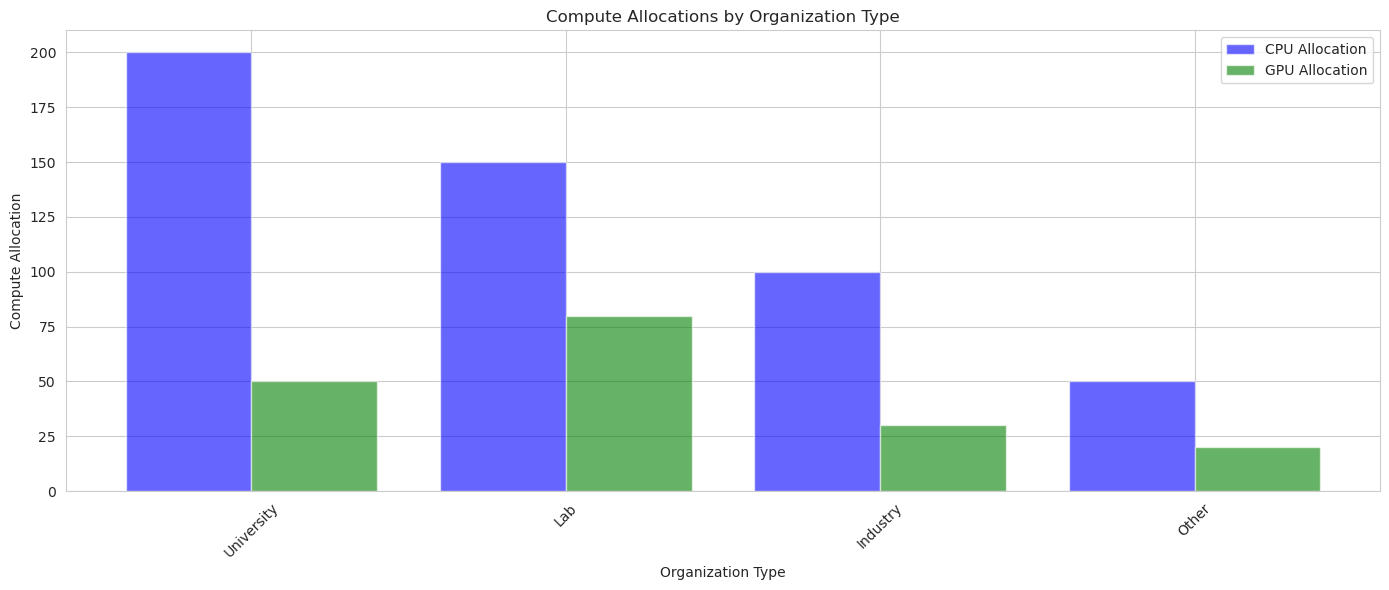

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock data
data = {
    'Organization Type': ['University', 'Lab', 'Industry', 'Other'],
    'CPU Compute Allocation': [200, 150, 100, 50],
    'GPU Compute Allocation': [50, 80, 30, 20]
}

org_types = data['Organization Type']
cpu_alloc = data['CPU Compute Allocation']
gpu_alloc = data['GPU Compute Allocation']

x = np.arange(len(org_types))
width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, cpu_alloc, width, label='CPU Allocation', color='blue', alpha=0.6)
plt.bar(x + width/2, gpu_alloc, width, label='GPU Allocation', color='green', alpha=0.6)

plt.title('Compute Allocations by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Compute Allocation')
plt.xticks(x, org_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Compute Allocations by Organization Country
We will visualize the CPU and GPU compute allocations across different countries. This will provide insights into the distribution of resources among various countries.

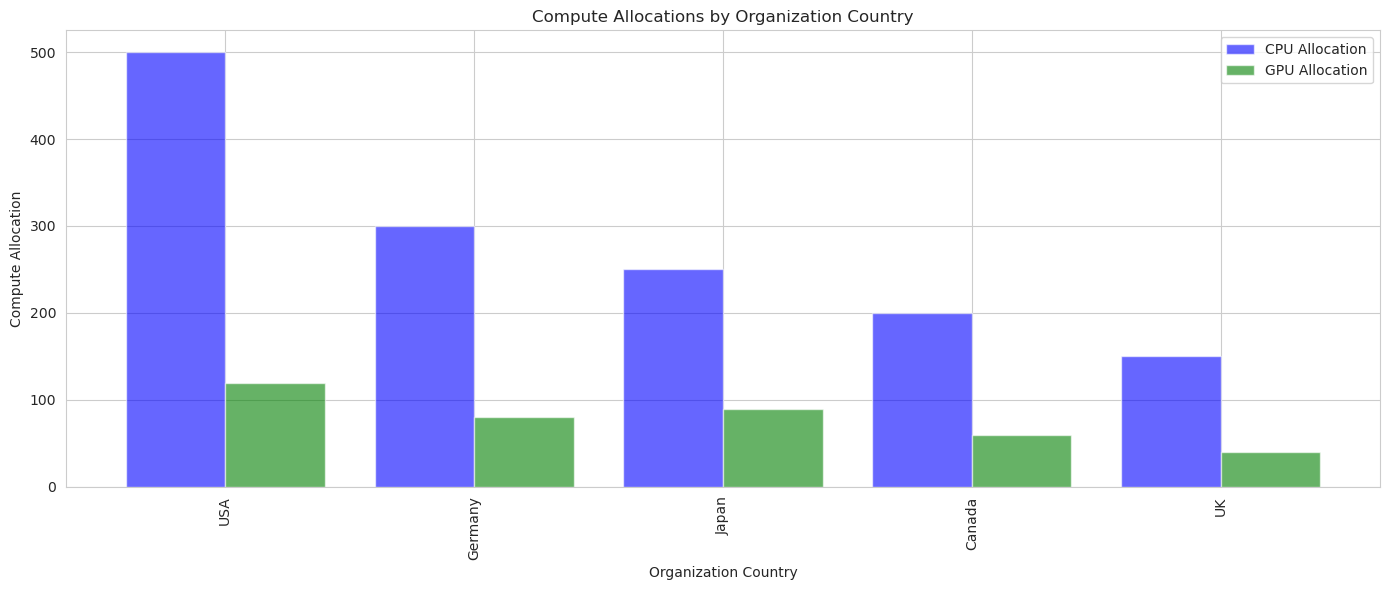

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock data
data = {
    'Organization Country': ['USA', 'Germany', 'Japan', 'Canada', 'UK'],
    'CPU Compute Allocation': [500, 300, 250, 200, 150],
    'GPU Compute Allocation': [120, 80, 90, 60, 40]
}

countries = data['Organization Country']
cpu_alloc = data['CPU Compute Allocation']
gpu_alloc = data['GPU Compute Allocation']

x = np.arange(len(countries))
width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, cpu_alloc, width, label='CPU Allocation', color='blue', alpha=0.6)
plt.bar(x + width/2, gpu_alloc, width, label='GPU Allocation', color='green', alpha=0.6)

plt.title('Compute Allocations by Organization Country')
plt.xlabel('Organization Country')
plt.ylabel('Compute Allocation')
plt.xticks(x, countries, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### Relationship Between Compute Allocations and Node Hours Charged
We will explore the relationship between compute allocations (both CPU and GPU) and the corresponding node hours charged. This analysis will help us understand how the allocated resources are being utilized.

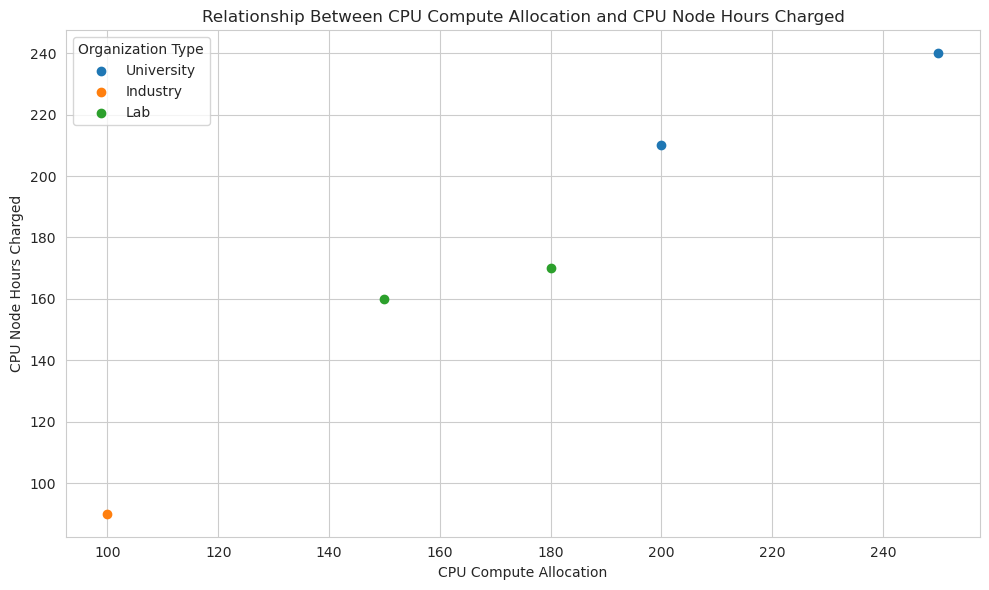

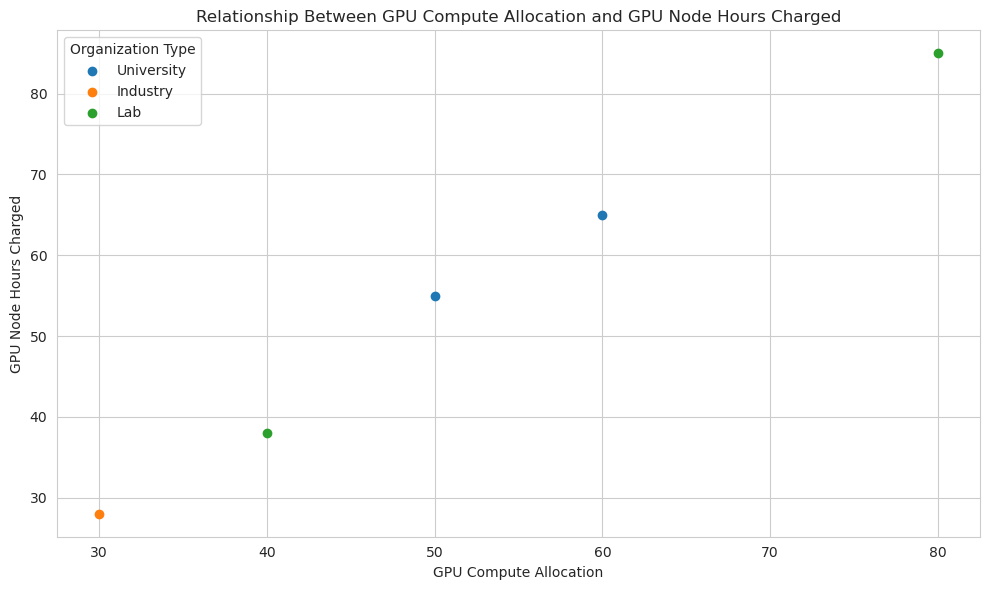

In [13]:
import matplotlib.pyplot as plt

# Example mock data
data = {
    'Organization Type': ['University', 'Lab', 'Industry', 'University', 'Lab'],
    'CPU Compute Allocation': [200, 150, 100, 250, 180],
    'CPU Node Hours Charged': [210, 160, 90, 240, 170],
    'GPU Compute Allocation': [50, 80, 30, 60, 40],
    'GPU Node Hours Charged': [55, 85, 28, 65, 38]
}

# Unique organization types for colors
org_types = list(set(data['Organization Type']))
colors = plt.cm.tab10(range(len(org_types)))
color_map = dict(zip(org_types, colors))

# --- CPU Scatter ---
plt.figure(figsize=(10, 6))
for org in org_types:
    mask = [ot == org for ot in data['Organization Type']]
    plt.scatter(
        [data['CPU Compute Allocation'][i] for i in range(len(mask)) if mask[i]],
        [data['CPU Node Hours Charged'][i] for i in range(len(mask)) if mask[i]],
        label=org,
        color=color_map[org]
    )

plt.title('Relationship Between CPU Compute Allocation and CPU Node Hours Charged')
plt.xlabel('CPU Compute Allocation')
plt.ylabel('CPU Node Hours Charged')
plt.legend(title='Organization Type')
plt.tight_layout()
plt.show()

# --- GPU Scatter ---
plt.figure(figsize=(10, 6))
for org in org_types:
    mask = [ot == org for ot in data['Organization Type']]
    plt.scatter(
        [data['GPU Compute Allocation'][i] for i in range(len(mask)) if mask[i]],
        [data['GPU Node Hours Charged'][i] for i in range(len(mask)) if mask[i]],
        label=org,
        color=color_map[org]
    )

plt.title('Relationship Between GPU Compute Allocation and GPU Node Hours Charged')
plt.xlabel('GPU Compute Allocation')
plt.ylabel('GPU Node Hours Charged')
plt.legend(title='Organization Type')
plt.tight_layout()
plt.show()


### Analysis of Active Users
We will analyze the active users in the dataset, focusing on their compute allocations and node hours charged. Understanding the behavior of active users can provide insights into resource utilization and efficiency.

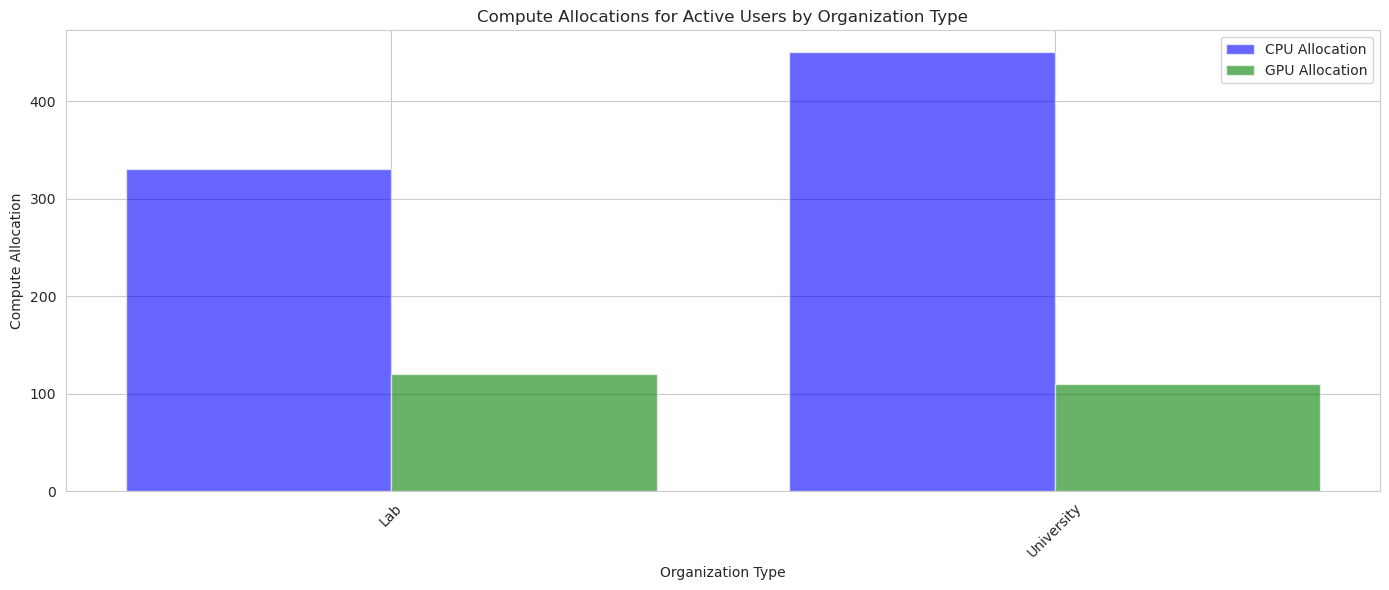

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock active users data
data = {
    'Organization Type': ['University', 'Lab', 'Industry', 'University', 'Lab'],
    'CPU Compute Allocation': [200, 150, 100, 250, 180],
    'GPU Compute Allocation': [50, 80, 30, 60, 40],
    'Is Active': ['True', 'True', 'False', 'True', 'True']
}

# Filter active users
active_mask = [val == 'True' for val in data['Is Active']]
org_types = [data['Organization Type'][i] for i in range(len(active_mask)) if active_mask[i]]
cpu_alloc = [data['CPU Compute Allocation'][i] for i in range(len(active_mask)) if active_mask[i]]
gpu_alloc = [data['GPU Compute Allocation'][i] for i in range(len(active_mask)) if active_mask[i]]

# Group by organization type
unique_orgs = sorted(set(org_types))
cpu_sum = [sum(cpu_alloc[i] for i in range(len(org_types)) if org_types[i] == org) for org in unique_orgs]
gpu_sum = [sum(gpu_alloc[i] for i in range(len(org_types)) if org_types[i] == org) for org in unique_orgs]

x = np.arange(len(unique_orgs))
width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, cpu_sum, width, label='CPU Allocation', color='blue', alpha=0.6)
plt.bar(x + width/2, gpu_sum, width, label='GPU Allocation', color='green', alpha=0.6)

plt.title('Compute Allocations for Active Users by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Compute Allocation')
plt.xticks(x, unique_orgs, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Analysis of Top Projects and Departments
We will analyze the top projects and departments in terms of compute allocations and node hours charged. Understanding the leading projects and departments can provide insights into the main areas of focus and resource consumption.

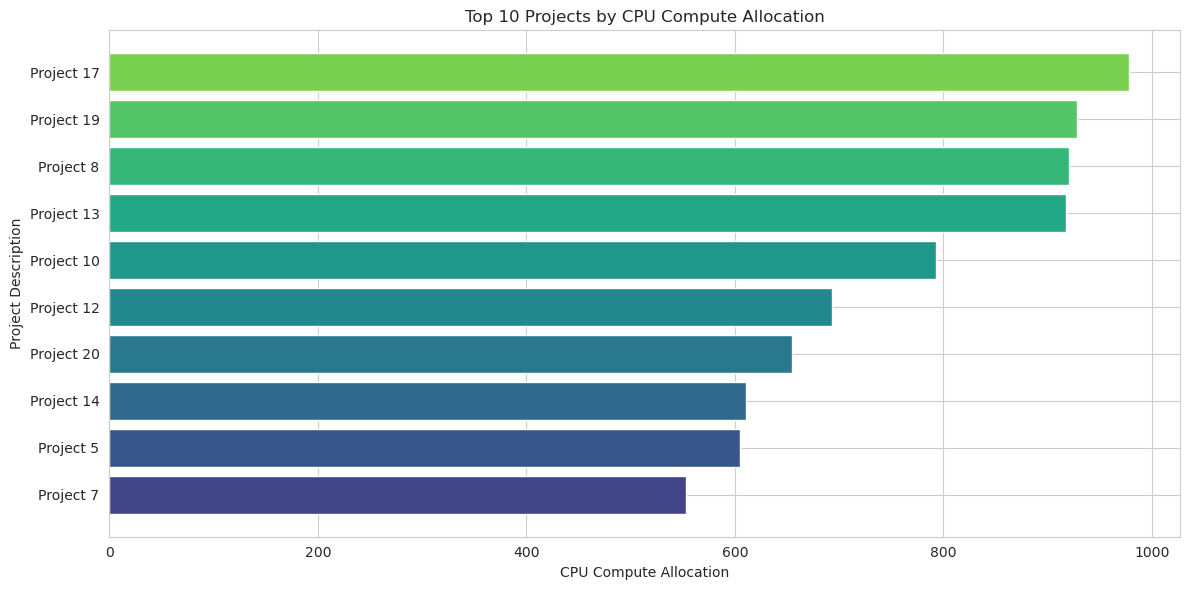

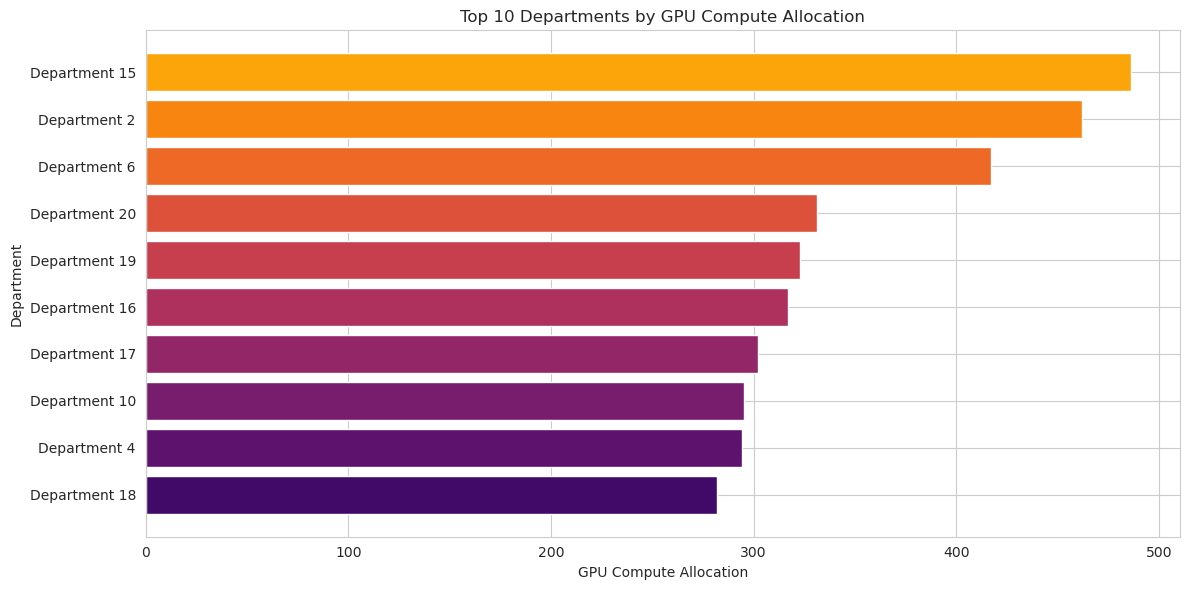

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock dataset
data = {
    'Project Description': [f'Project {i}' for i in range(1, 21)],
    'CPU Compute Allocation': np.random.randint(100, 1000, 20),
    'Department': [f'Department {i}' for i in range(1, 21)],
    'GPU Compute Allocation': np.random.randint(50, 500, 20)
}

# --- Top Projects by CPU ---
top_projects_cpu_idx = np.argsort(data['CPU Compute Allocation'])[-10:]
top_projects_cpu_desc = [data['Project Description'][i] for i in top_projects_cpu_idx]
top_projects_cpu_vals = [data['CPU Compute Allocation'][i] for i in top_projects_cpu_idx]

plt.figure(figsize=(12, 6))
bars = plt.barh(top_projects_cpu_desc, top_projects_cpu_vals, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_projects_cpu_vals))))
plt.title('Top 10 Projects by CPU Compute Allocation')
plt.xlabel('CPU Compute Allocation')
plt.ylabel('Project Description')
plt.tight_layout()
plt.show()

# --- Top Departments by GPU ---
top_departments_gpu_idx = np.argsort(data['GPU Compute Allocation'])[-10:]
top_departments_gpu_names = [data['Department'][i] for i in top_departments_gpu_idx]
top_departments_gpu_vals = [data['GPU Compute Allocation'][i] for i in top_departments_gpu_idx]

plt.figure(figsize=(12, 6))
bars = plt.barh(top_departments_gpu_names, top_departments_gpu_vals, color=plt.cm.inferno(np.linspace(0.2, 0.8, len(top_departments_gpu_vals))))
plt.title('Top 10 Departments by GPU Compute Allocation')
plt.xlabel('GPU Compute Allocation')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


### Geographic Distribution of Organizations
We will visualize the geographic distribution of organizations based on their city and country. This analysis will provide a spatial understanding of where the organizations in the dataset are located.

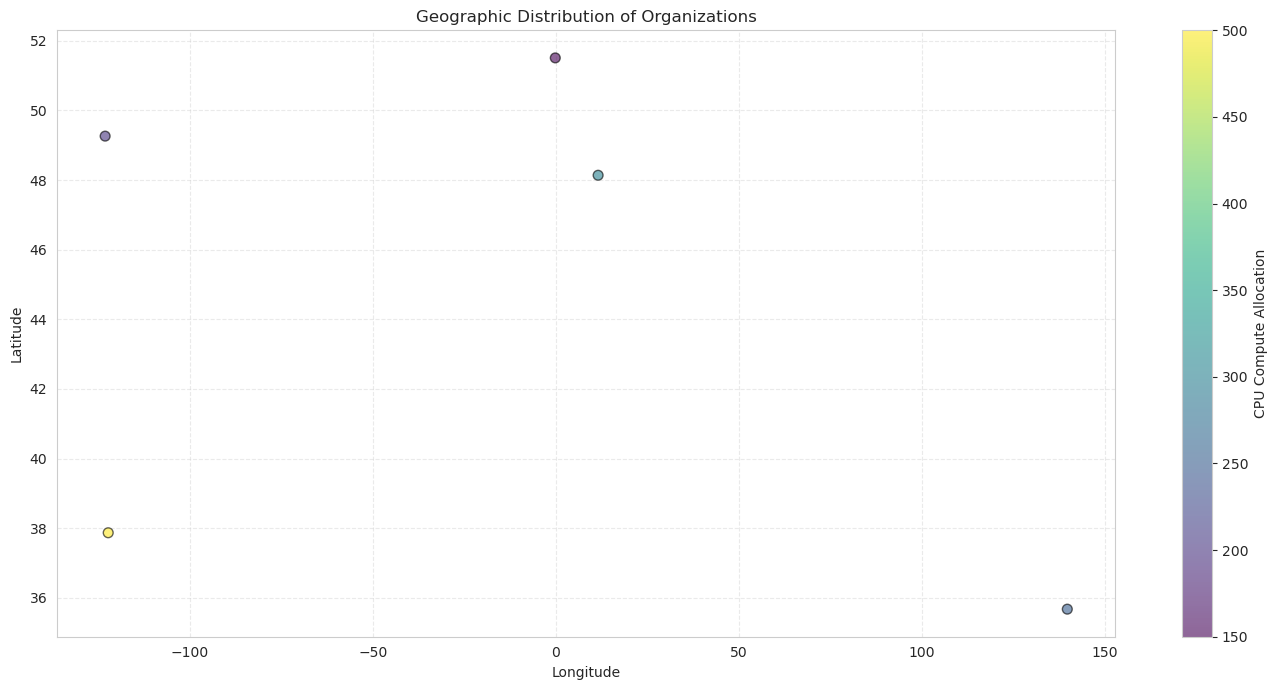

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

# Example mock dataset
data = pd.DataFrame({
    'Organization City': ['Berkeley', 'Munich', 'Tokyo', 'Vancouver', 'London'],
    'Organization Country': ['USA', 'Germany', 'Japan', 'Canada', 'UK'],
    'CPU Compute Allocation': [500, 300, 250, 200, 150]
})

# Function to geocode using Nominatim API directly
def geocode_location(row):
    query = f"{row['Organization City']}, {row['Organization Country']}"
    url = "https://nominatim.openstreetmap.org/search"
    params = {"q": query, "format": "json", "limit": 1}
    
    try:
        response = requests.get(url, params=params, headers={"User-Agent": "geoapi"})
        if response.status_code == 200 and response.json():
            loc = response.json()[0]
            return float(loc["lat"]), float(loc["lon"])
    except Exception as e:
        print(f"Error geocoding {query}: {e}")
    
    return None, None

# Apply geocoding with rate limiting (to respect Nominatim's usage policy)
coords = []
for _, row in data.iterrows():
    coords.append(geocode_location(row))
    time.sleep(1)  # polite delay between requests

data['Latitude'], data['Longitude'] = zip(*coords)

# Filter out rows with no coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])

# Plot
plt.figure(figsize=(14, 7))
sc = plt.scatter(
    data['Longitude'], data['Latitude'],
    c=data['CPU Compute Allocation'],
    cmap='viridis', s=50, alpha=0.6, edgecolor='k'
)
plt.title('Geographic Distribution of Organizations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(sc, label='CPU Compute Allocation')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


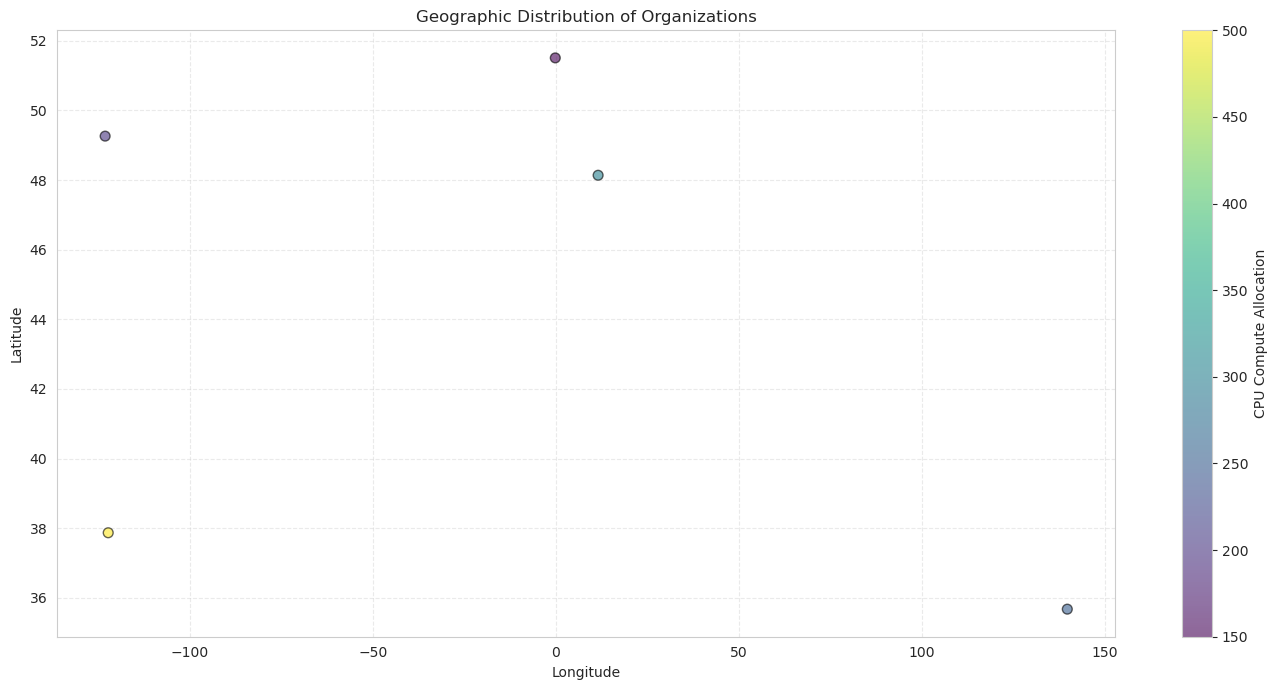

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

# Example mock dataset
data = pd.DataFrame({
    'Organization City': ['Berkeley', 'Munich', 'Tokyo', 'Vancouver', 'London'],
    'Organization Country': ['USA', 'Germany', 'Japan', 'Canada', 'UK'],
    'CPU Compute Allocation': [500, 300, 250, 200, 150]
})

# Function to geocode using Nominatim API directly
def geocode_location(row):
    query = f"{row['Organization City']}, {row['Organization Country']}"
    url = "https://nominatim.openstreetmap.org/search"
    params = {"q": query, "format": "json", "limit": 1}
    
    try:
        response = requests.get(url, params=params, headers={"User-Agent": "geoapi"})
        if response.status_code == 200 and response.json():
            loc = response.json()[0]
            return float(loc["lat"]), float(loc["lon"])
    except Exception as e:
        print(f"Error geocoding {query}: {e}")
    
    return None, None

# Apply geocoding with a short delay between requests
coords = []
for _, row in data.iterrows():
    coords.append(geocode_location(row))
    time.sleep(1)  # Nominatim API courtesy delay

data['Latitude'], data['Longitude'] = zip(*coords)

# Filter out rows with no coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])

# Plot geographic distribution
plt.figure(figsize=(14, 7))
sc = plt.scatter(
    data['Longitude'], data['Latitude'],
    c=data['CPU Compute Allocation'],
    cmap='viridis', s=50, alpha=0.6, edgecolor='k'
)
plt.title('Geographic Distribution of Organizations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(sc, label='CPU Compute Allocation')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Analysis of GPU Utilization
We will analyze the GPU utilization across different organization types and projects. Understanding GPU utilization can provide insights into the computational demands and efficiency of various research and development activities.

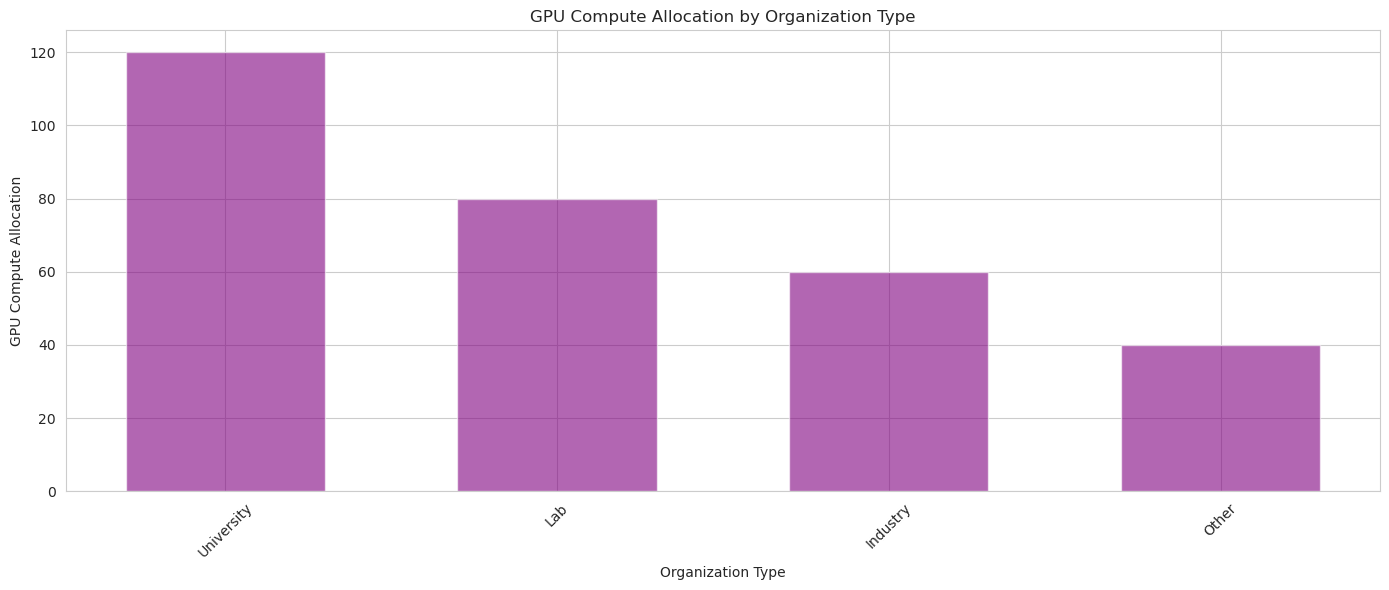

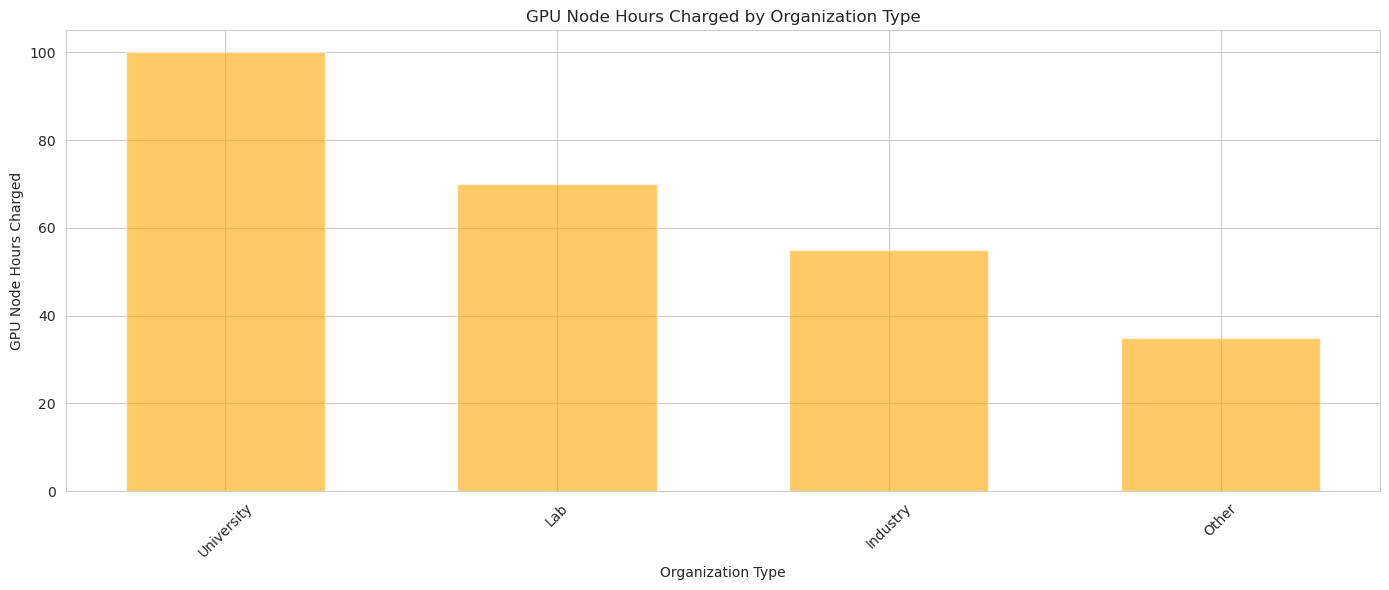

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock dataset
data = {
    'Organization Type': ['University', 'Lab', 'Industry', 'Other'],
    'GPU Compute Allocation': [120, 80, 60, 40],
    'GPU Node Hours Charged': [100, 70, 55, 35]
}

org_types = data['Organization Type']
gpu_alloc = data['GPU Compute Allocation']
gpu_hours = data['GPU Node Hours Charged']

x = np.arange(len(org_types))
width = 0.6  # wider bars since we're not grouping

# --- GPU Compute Allocation ---
plt.figure(figsize=(14, 6))
plt.bar(x, gpu_alloc, width, color='purple', alpha=0.6)
plt.title('GPU Compute Allocation by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('GPU Compute Allocation')
plt.xticks(x, org_types, rotation=45)
plt.tight_layout()
plt.show()

# --- GPU Node Hours Charged ---
plt.figure(figsize=(14, 6))
plt.bar(x, gpu_hours, width, color='orange', alpha=0.6)
plt.title('GPU Node Hours Charged by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('GPU Node Hours Charged')
plt.xticks(x, org_types, rotation=45)
plt.tight_layout()
plt.show()


### Investigating Inactive Users
We will investigate the inactive users in the dataset, focusing on their previous compute allocations and node hours charged. Understanding the characteristics of inactive users can provide insights into resource allocation strategies and potential areas for optimization.

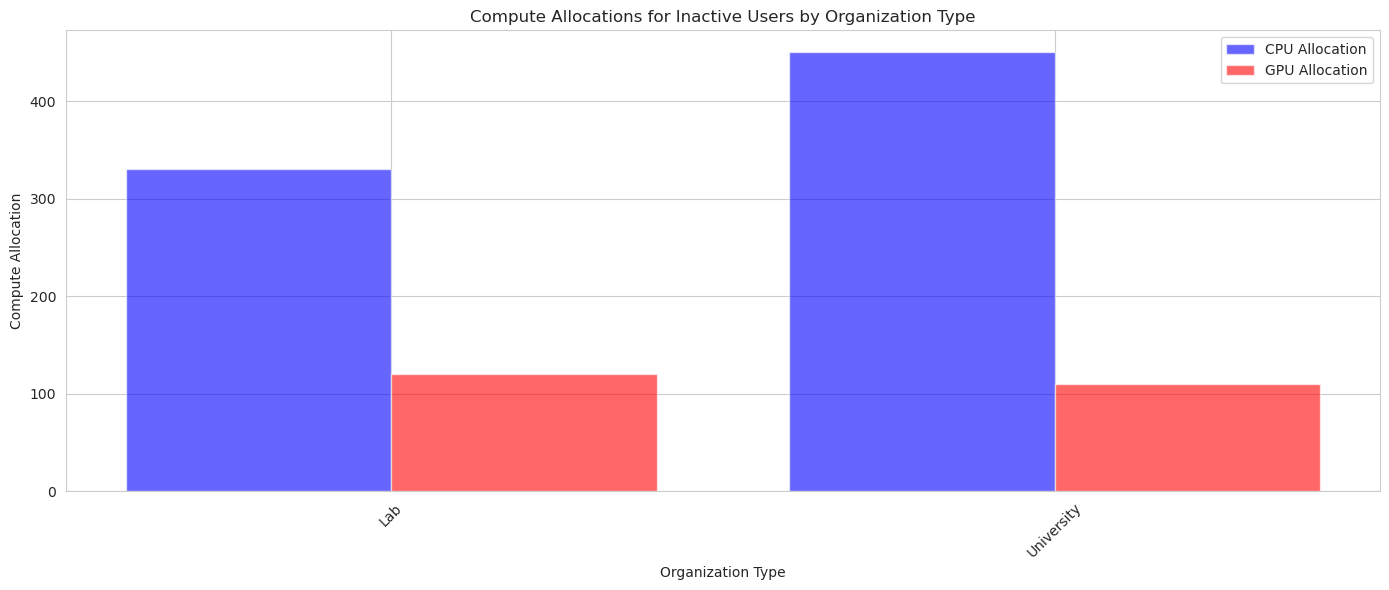

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Example mock data
data = {
    'Organization Type': ['University', 'Lab', 'Industry', 'University', 'Lab'],
    'CPU Compute Allocation': [200, 150, 100, 250, 180],
    'GPU Compute Allocation': [50, 80, 30, 60, 40],
    'Is Active': ['False', 'False', 'True', 'False', 'False']
}

# Filter inactive users
inactive_mask = [val == 'False' for val in data['Is Active']]
org_types = [data['Organization Type'][i] for i in range(len(inactive_mask)) if inactive_mask[i]]
cpu_alloc = [data['CPU Compute Allocation'][i] for i in range(len(inactive_mask)) if inactive_mask[i]]
gpu_alloc = [data['GPU Compute Allocation'][i] for i in range(len(inactive_mask)) if inactive_mask[i]]

# Group by organization type
unique_orgs = sorted(set(org_types))
cpu_sum = [sum(cpu_alloc[i] for i in range(len(org_types)) if org_types[i] == org) for org in unique_orgs]
gpu_sum = [sum(gpu_alloc[i] for i in range(len(org_types)) if org_types[i] == org) for org in unique_orgs]

x = np.arange(len(unique_orgs))
width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, cpu_sum, width, label='CPU Allocation', color='blue', alpha=0.6)
plt.bar(x + width/2, gpu_sum, width, label='GPU Allocation', color='red', alpha=0.6)

plt.title('Compute Allocations for Inactive Users by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Compute Allocation')
plt.xticks(x, unique_orgs, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Exercise: NERSC Usage Analysis

In this exercise, we will dive deeper into the usage data of NERSC. We will focus on three questions to analyze in order to identify the top users and projects in terms of CPU and GPU usage, and understanding the distribution of users across different organizational roles. This analysis can provide valuable insights into resource utilization and allocation strategies at NERSC.

Each exercise below provides you with an exploratory question.  Develop your code in the cell provided below each question.

Please note that a solution to these exercises is provided after question 3.

Top Users: Identify the top 10 users for CPU usage and GPU usage. This will help us understand which users are consuming the most resources.

#### Additional NERSC User Analysis Question 2:
'Top Projects: Find the top 10 projects (in terms of CPU and GPU usage) that have used the most percentage of their allocation hours. This will give us an idea of which projects are utilizing their allocated resources to the fullest.

#### Additional NERSC User Analysis Question 3

User Distribution: Plot the user distribution of organization roles using a pie chart. This will help us understand the composition of users in terms of their roles within their organizations.

#### Additional NERSC User Analysis Questions Solution Set

1)

##### Top 10 users for CPU usage
top_cpu_users = data.sort_values('CPU Usage', ascending=False).head(10)

##### Top 10 users for GPU usage
top_gpu_users = data.sort_values('GPU Usage', ascending=False).head(10)

2)
##### Calculate percentage of allocation hours used for each project
data['CPU Allocation Percentage'] = data['CPU Usage'] / data['CPU Allocation Hours']
data['GPU Allocation Percentage'] = data['GPU Usage'] / data['GPU Allocation Hours']

##### Top 10 projects for CPU usage
top_cpu_projects = data.sort_values('CPU Allocation Percentage', ascending=False).head(10)

##### Top 10 projects for GPU usage
top_gpu_projects = data.sort_values('GPU Allocation Percentage', ascending=False).head(10)


3)

#### Plot user distribution by organization role
role_distribution = data['Organization Role'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(role_distribution, labels=role_distribution.index, autopct='%1.1f%%')
plt.title('User Distribution by Organization Role')
plt.show()


### Summary and Recommendations
Based on the analysis conducted, we can summarize key findings and provide recommendations for optimizing resource allocations, enhancing efficiency, and supporting various research and development activities.

#### Key Findings
- **Active Users:** The analysis of active users showed variations in compute allocations across different organization types. Understanding the behavior of active users provided insights into resource utilization and efficiency.
- **Top Projects and Departments:** The leading projects and departments were identified based on compute allocations, highlighting the main areas of focus and resource consumption.
- **Geographic Distribution:** The spatial distribution of organizations provided an understanding of where the organizations are located, with variations in CPU compute allocation.
- **GPU Utilization:** GPU utilization across different organization types was analyzed, revealing insights into computational demands and efficiency.
- **Inactive Users:** Investigating inactive users and their previous compute allocations provided insights into resource allocation strategies and potential areas for optimization.

#### Recommendations
- **Optimize Resource Allocation:** Regularly review and reallocate resources based on user activity and project requirements to ensure efficient utilization.
- **Support Key Projects and Departments:** Allocate additional resources to top-performing projects and departments to foster innovation and research.
- **Enhance GPU Utilization:** Evaluate GPU demands and allocate resources accordingly to support computationally intensive tasks.
- **Monitor Inactive Users:** Implement monitoring and notification mechanisms to identify inactive users and reallocate resources as needed.
- **Consider Geographic Distribution:** Take into account the geographic distribution of organizations when planning infrastructure and support services.